In [456]:
# Time period	Under-five deaths	Prevalence of HIV, total (% of population ages 15-49)	Life expectancy at birth, total (years)	Population, total	Physicians (per 1,000 people)


In [457]:
# IMPORTING LIBRARIES
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore")

In [458]:
# IMPORTING DATASET
dataset = pd.read_excel("demographics resources allocation.xlsx")
dataset.head(2)

,Time period,Under-five deaths,"Prevalence of HIV, total (% of population ages 15-49)","Life expectancy at birth, total (years)","Population, total","Physicians (per 1,000 people)"
0,2008-01,27133,3.4,61.134,9781996,0.052
1,2009-01,24841,3.4,61.958,10043737,0.055


In [459]:
# MAKE TIME PERIOD THE DATETIME TYPE
dataset["Time period"] = pd.to_datetime(dataset["Time period"])

# CHECKING FOR NULL VALUES
dataset.isnull().sum()

Time period                                              0
Under-five deaths                                        0
Prevalence of HIV, total (% of population ages 15-49)    0
Life expectancy at birth, total (years)                  0
Population, total                                        0
Physicians (per 1,000 people)                            1
dtype: int64

In [460]:
# IMPUTING NULL VALUES - USING MEAN OF PREV & NEXT FOR Physicians (per 1,000 people) COLUMN
dataset["Physicians (per 1,000 people)"] = dataset["Physicians (per 1,000 people)"].fillna(
    (dataset["Physicians (per 1,000 people)"].shift() + dataset["Physicians (per 1,000 people)"].shift(-1)) / 2)

dataset.isnull().sum()

Time period                                              0
Under-five deaths                                        0
Prevalence of HIV, total (% of population ages 15-49)    0
Life expectancy at birth, total (years)                  0
Population, total                                        0
Physicians (per 1,000 people)                            0
dtype: int64

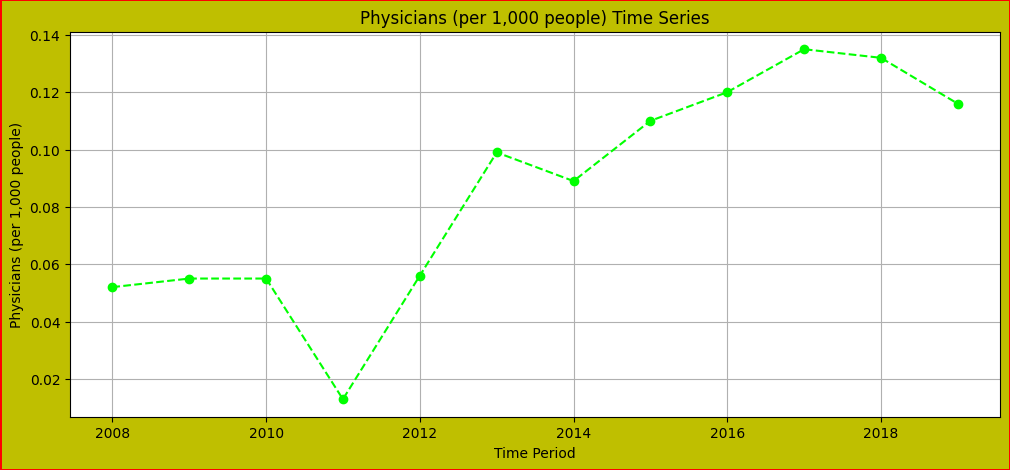

In [461]:
# PHYSICIANS (PER 1,000 PEOPLE) TIME SERIES
dataset.set_index("Time period", inplace=True)

# PLOT THE TIME SERIES
plt.figure(figsize=(12, 5), edgecolor="r", facecolor="y", linewidth=1)
plt.plot(
    dataset["Physicians (per 1,000 people)"], color="lime", marker="o", linestyle="--"
)
plt.xlabel("Time Period")
plt.ylabel("Physicians (per 1,000 people)")
plt.title("Physicians (per 1,000 people) Time Series")
plt.grid(True)
plt.show()

In [462]:
# TARGET VARIABLE: PHYSICIANS (PER 1,000 PEOPLE)
y = dataset["Physicians (per 1,000 people)"]

# INDEPENDENT VARIABLES: UNDER-FIVE DEATHS, PREVALENCE OF HIV, LIFE EXPECTANCY AT BIRTH, POPULATION
X = dataset[["Under-five deaths", "Prevalence of HIV, total (% of population ages 15-49)",
             "Life expectancy at birth, total (years)", "Population, total"]]

# SPLITTING THE DATASET INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TRAINING THE MODEL
model = LinearRegression()
model.fit(X_train, y_train)

# MAKING PREDICTIONS
y_pred = model.predict(X_test)

# MODEL EVALUATION
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 0.74


In [463]:
# REMOVE ROW OF THE YEAR 2011 FROM THE DATASET AS AN OUTLIER
dataset_no_2011 = dataset.drop(index="2011-01-01", axis=0)
dataset_no_2011.head()

,Under-five deaths,"Prevalence of HIV, total (% of population ages 15-49)","Life expectancy at birth, total (years)","Population, total","Physicians (per 1,000 people)"
Time period,,,,,
2008-01-01,27133,3.4,61.134,9781996,0.05200
2009-01-01,24841,3.4,61.958,10043737,0.05500
2010-01-01,22785,3.3,62.540,10309031,0.05500
2012-01-01,19566,3.2,64.009,10840334,0.05595
2013-01-01,18565,3.1,64.426,11101350,0.09900


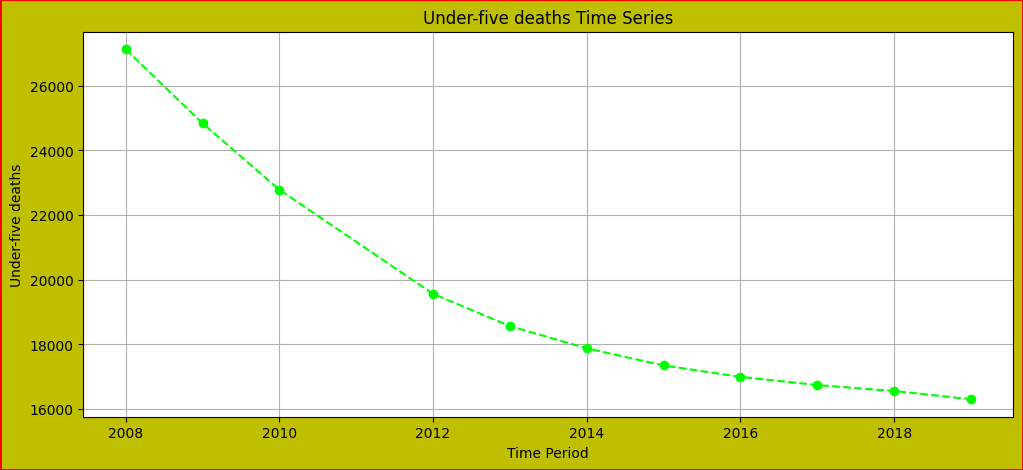

In [464]:
# TIME SERIES PLOT OF THE NEW DATASET
plt.figure(figsize=(12, 5), edgecolor="r", facecolor="y", linewidth=1)
plt.plot(dataset_no_2011["Under-five deaths"], color="lime", marker="o", linestyle="--")
plt.xlabel("Time Period")
plt.ylabel("Under-five deaths")
plt.title("Under-five deaths Time Series")
plt.grid(True)
plt.show()

In [465]:
# NEW DATA
y = dataset_no_2011["Physicians (per 1,000 people)"].values
X = dataset_no_2011[["Under-five deaths", "Prevalence of HIV, total (% of population ages 15-49)",
                     "Life expectancy at birth, total (years)", "Population, total"]].values

# SPLITTING THE DATASET INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TRAINING THE MODEL
model = LinearRegression()
model.fit(X_train, y_train)

# MAKING PREDICTIONS
y_pred = model.predict(X_test)

# MODEL EVALUATION
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 0.92
